<a href="https://colab.research.google.com/github/Pengyu-gis/Historical-Aerial-Photos/blob/main/Tif_Colorization/Deoldify_Colorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the DeOldify repository
!git clone https://github.com/jantic/DeOldify.git
%cd DeOldify

# Install required libraries
!pip install -r requirements-colab.txt
!pip install ffmpeg
!pip install fastai==1.0.61


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.60
    Uninstalling fastai-1.0.60:
      Successfully uninstalled fastai-1.0.60


In [3]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth


mkdir: cannot create directory ‘models’: File exists
--2024-11-20 21:12:11--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 143.244.50.90, 2400:52e0:1a01::993:1
Connecting to data.deepai.org (data.deepai.org)|143.244.50.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  5.07MB/s    in 50s     

2024-11-20 21:13:00 (4.90 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [9]:
!wget https://www.dropbox.com/s/axsd2g85uyixaho/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth

--2024-11-20 21:20:21--  https://www.dropbox.com/s/axsd2g85uyixaho/ColorizeStable_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/lqpj4methnbmgjd9wlqto/ColorizeStable_gen.pth?rlkey=sj7d54400lq8898wf3s2higco&dl=0 [following]
--2024-11-20 21:20:21--  https://www.dropbox.com/scl/fi/lqpj4methnbmgjd9wlqto/ColorizeStable_gen.pth?rlkey=sj7d54400lq8898wf3s2higco&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc75894e0578045fea904cf232ca.dl.dropboxusercontent.com/cd/0/inline/CewiEocuT0WkO9j3jXR6JB6Au9UB8nU9q8FavnS4YtxbCjPcdd-ycA_iqPeyu6mlt9ztkRhGWCn1s3vRIX13Hsd-LrEZtuY38KCYdr5JUe3BJLWes3bYVr0Vm9xMoFhIlV5lE1bKx3GMNwOTO-sjPlNM/file# [following]
--2024-11-20 21:20:24--  https://uc75894e0578045fea904cf

In [10]:
# Import necessary modules
from deoldify import device
from deoldify.device_id import DeviceId
from deoldify.visualize import get_image_colorizer

# Set up GPU for processing
device.set(device=DeviceId.GPU0)

# Load the image colorizer model
colorizer = get_image_colorizer(artistic=False)


/content/DeOldify/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/content/DeOldify/fastai/data_block.py:453: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  warn("""Your validation set is empty. If this is by design, use `split_none()`
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  wa

In [6]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 59.9 MB/s eta 0:00:00


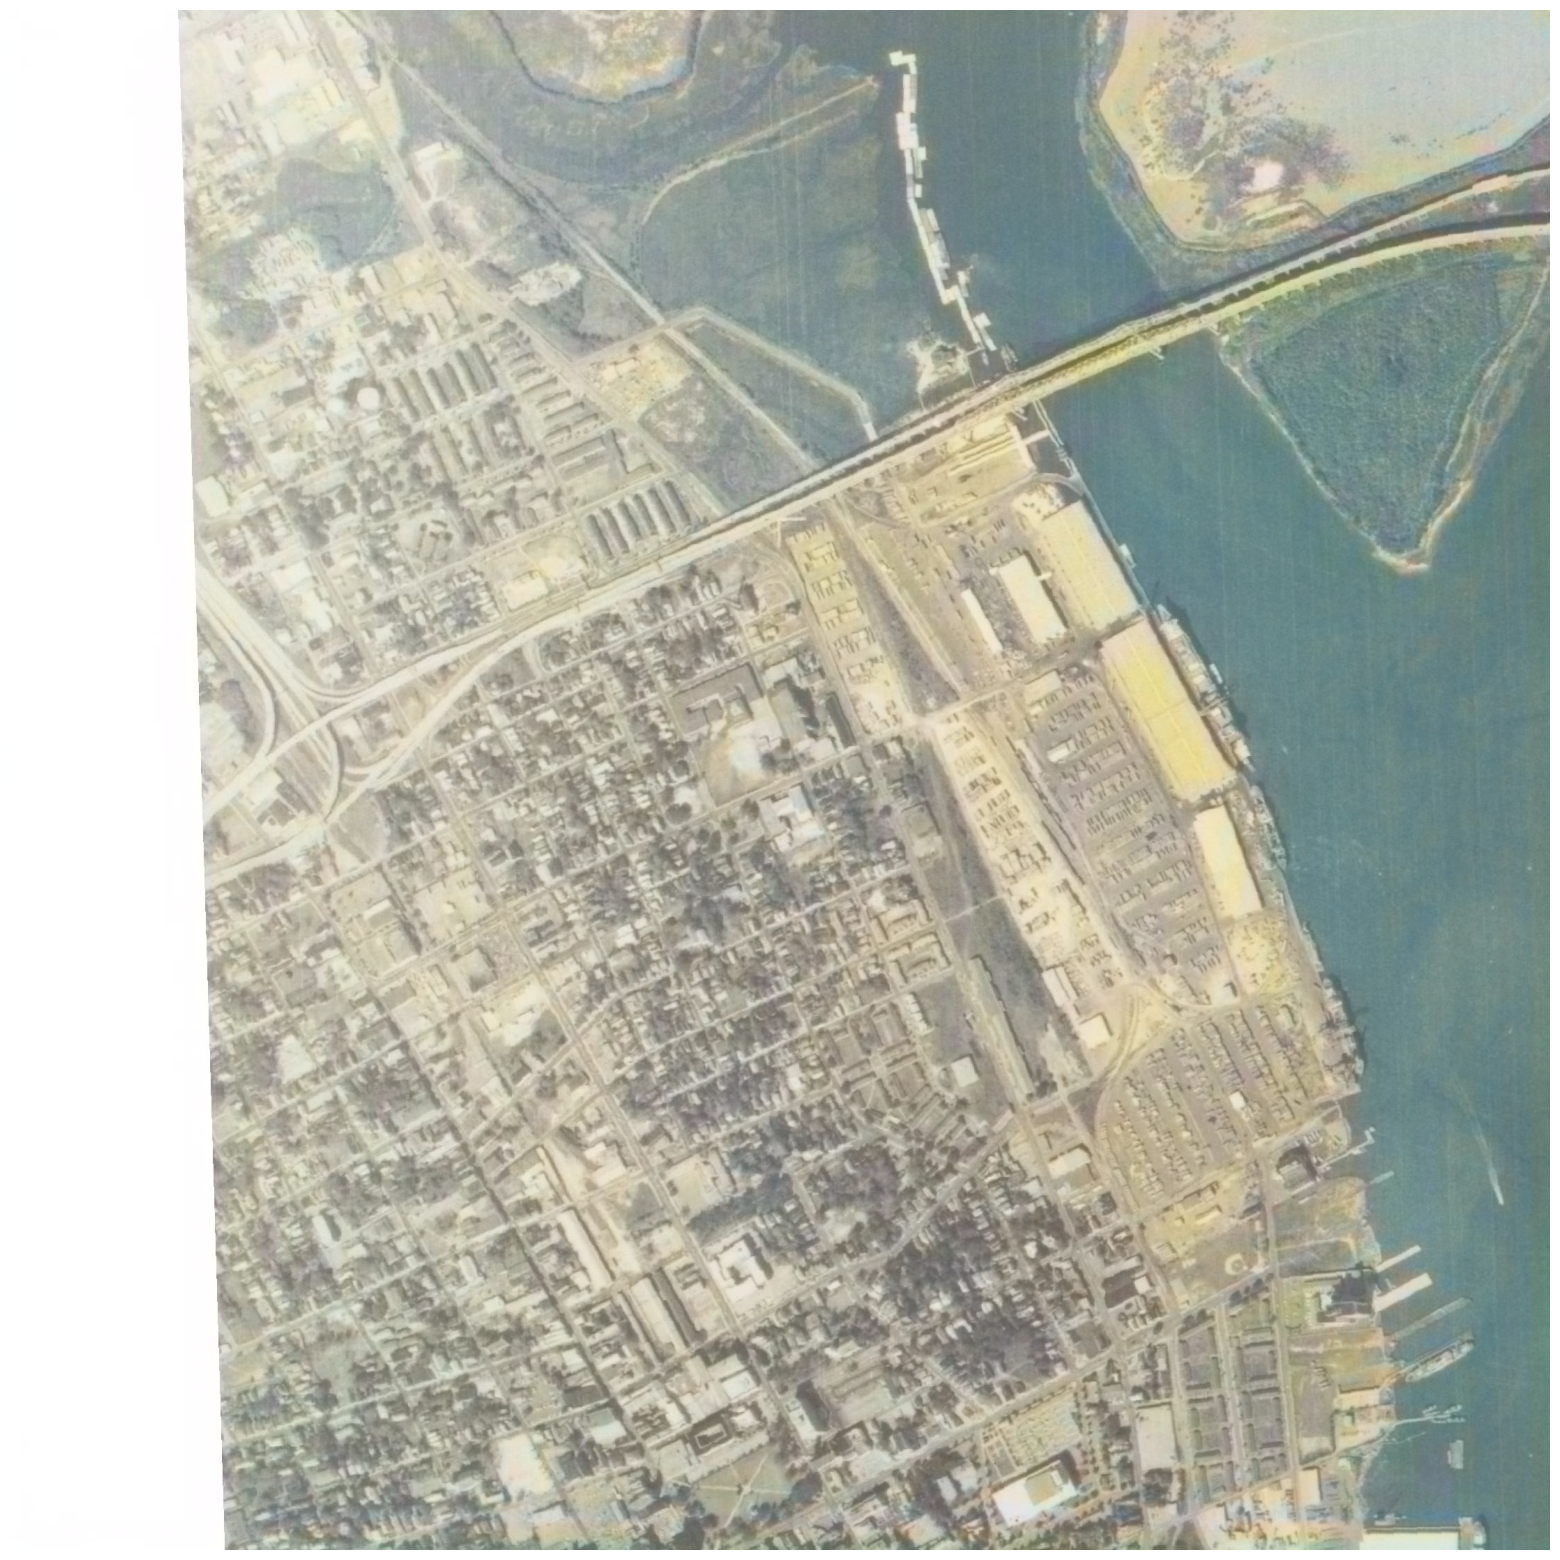

In [11]:
from PIL import Image
import rasterio
import numpy as np

# Step 1: Convert .tif to .jpg
def tif_to_jpg(input_tif, output_jpg):
    with rasterio.open(input_tif) as src:
        data = src.read(1)  # Read the first band (grayscale)
    img = Image.fromarray(data).convert("L")  # Convert to grayscale
    img.save(output_jpg, "JPEG")
    return output_jpg

# Step 2: Convert .jpg back to .tif (with metadata)
def jpg_to_tif(input_jpg, output_tif, original_meta):
    img = Image.open(input_jpg)
    data = np.array(img)

    with rasterio.open(output_tif, "w", **original_meta) as dst:
        dst.write(data, 1)  # Write the single band or adjust for RGB

# Example Usage
input_tif = "/content/drive/MyDrive/aerial_photos/square_patches/patch_5.tif"
output_jpg = "output.jpg"
output_tif = "colorized_output.tif"

# Convert TIFF to JPEG
jpg_path = tif_to_jpg(input_tif, output_jpg)

# Use DeOldify to colorize
colorizer.plot_transformed_image(path=jpg_path, render_factor=10)

# Convert back to TIFF with metadata
original_meta = rasterio.open(input_tif).meta
jpg_to_tif(jpg_path, output_tif, original_meta)
